## License
This file is part of the project megFingerprinting. All of megFingerprinting code is free software: you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation, either version 3 of the License, or (at your option) any later version. megFingerprinting is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with megFingerprinting. If not, see https://www.gnu.org/licenses/.

In [1]:
import difflib
from fuzzywuzzy import fuzz
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
from os import listdir
from os.path import isfile, join
import pandas as pd
import re
import seaborn as sns
import scipy as sp
import scipy.io as sio
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr
sns.set(font_scale=2)
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("husl", 8))
import math

/Users/jasondsc/opt/anaconda3/lib/python3.7/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sp.stats.sem(a)
    h = np.percentile(a, (1-((1-confidence)/2))*100)
    l = np.percentile(a, ((1-confidence)/2)*100)
    return m, l, h



# I. Subject Identifiability: Original Feature Space vs PCA Reconstructed

In [18]:
# please not you will have to chnage the index into the file name depending on the folder (i.e., challenge)
# note that the specparam data has only 115 features
# also note narrow band analyses are preformed by subsetting into the psd_martix
# i.e., delta 0:12, theta 12:24, alpha 24:39, beta 39:60, gamma 90:150, h gamma 150:451

# Parameters
n_subs = 154 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraFUL/') if isfile(join('NEWspectraFUL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraFUL/' + iFile
    print(sub)
    print(sub[33])
    if sub[33] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        

NEWspectraFUL/sub_00001_spectrum_training.csv
t
0001
NEWspectraFUL/sub_00001_spectrum_validation.csv
v
0001
NEWspectraFUL/sub_00002_spectrum_training.csv
t
0002
NEWspectraFUL/sub_00002_spectrum_validation.csv
v
0002
NEWspectraFUL/sub_00003_spectrum_training.csv
t
0003
NEWspectraFUL/sub_00003_spectrum_validation.csv
v
0003
NEWspectraFUL/sub_00004_spectrum_training.csv
t
0004
NEWspectraFUL/sub_00004_spectrum_validation.csv
v
0004
NEWspectraFUL/sub_00005_spectrum_training.csv
t
0005
NEWspectraFUL/sub_00005_spectrum_validation.csv
v
0005
NEWspectraFUL/sub_00006_spectrum_training.csv
t
0006
NEWspectraFUL/sub_00006_spectrum_validation.csv
v
0006
NEWspectraFUL/sub_00007_spectrum_training.csv
t
0007
NEWspectraFUL/sub_00007_spectrum_validation.csv
v
0007
NEWspectraFUL/sub_00008_spectrum_training.csv
t
0008
NEWspectraFUL/sub_00008_spectrum_validation.csv
v
0008
NEWspectraFUL/sub_00009_spectrum_training.csv
t
0009
NEWspectraFUL/sub_00009_spectrum_validation.csv
v
0009
NEWspectraFUL/sub_00010_spec

NEWspectraFUL/sub_00077_spectrum_training.csv
t
0077
NEWspectraFUL/sub_00077_spectrum_validation.csv
v
0077
NEWspectraFUL/sub_00078_spectrum_training.csv
t
0078
NEWspectraFUL/sub_00078_spectrum_validation.csv
v
0078
NEWspectraFUL/sub_00079_spectrum_training.csv
t
0079
NEWspectraFUL/sub_00079_spectrum_validation.csv
v
0079
NEWspectraFUL/sub_00080_spectrum_training.csv
t
0080
NEWspectraFUL/sub_00080_spectrum_validation.csv
v
0080
NEWspectraFUL/sub_00081_spectrum_training.csv
t
0081
NEWspectraFUL/sub_00081_spectrum_validation.csv
v
0081
NEWspectraFUL/sub_00082_spectrum_training.csv
t
0082
NEWspectraFUL/sub_00082_spectrum_validation.csv
v
0082
NEWspectraFUL/sub_00083_spectrum_training.csv
t
0083
NEWspectraFUL/sub_00083_spectrum_validation.csv
v
0083
NEWspectraFUL/sub_00084_spectrum_training.csv
t
0084
NEWspectraFUL/sub_00084_spectrum_validation.csv
v
0084
NEWspectraFUL/sub_00085_spectrum_training.csv
t
0085
NEWspectraFUL/sub_00085_spectrum_validation.csv
v
0085
NEWspectraFUL/sub_00086_spec

NEWspectraFUL/sub_00153_spectrum_training.csv
t
0153
NEWspectraFUL/sub_00153_spectrum_validation.csv
v
0153
NEWspectraFUL/sub_00154_spectrum_training.csv
t
0154
NEWspectraFUL/sub_00154_spectrum_validation.csv
v
0154


In [19]:
# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

When predicting the target from the database, we get a 80.51% accuracy
When predicting the database from the target, we get a 85.06% accuracy


In [20]:
# For the figure, we also get self-identifiability and reconstructed self-identifiability
self_id= np.diagonal(sp.stats.zscore(predictions, axis = 1))

print(self_id)

#df = pd.DataFrame(self_id)
#df.to_csv("self_ID.csv")

#df = pd.DataFrame(predictions)
#df.to_csv("NEW_predictions_corr_matrix.csv")


[ 3.77939984  2.47436539  2.60792853  2.96995938  0.94867865  5.61588982
  2.56713474  3.94704806  3.83238391  1.9622272   2.43112791  3.31246999
  4.06427298  3.03711349  4.19441949  2.21912761  3.23838899  2.92543752
  5.09301183  1.50512123  2.57357626  2.96525227  4.259534    2.58620437
  3.39886477  2.52848681  1.20508137  1.45072603  4.36857568  3.3127797
  3.14874046  1.98535013  3.42695218  3.22330398  3.44417099  5.06044617
  3.40187011  2.58560739  0.92760815  2.84551176  2.3382344   3.62453202
  3.04271299  3.0773208   2.20437802  3.36452658  3.33245538  3.6617166
  1.95308886  1.57492052  3.22136906  3.66539334  2.81407341  3.09151273
  3.49947028  4.7573952   3.7662918   5.43438757  3.01866868  3.67948022
  4.25503272  2.65553925  3.7280117   2.29721629  5.08855174  3.24261287
  3.30827066  2.84063156  4.09803868  3.38934097  3.38642685  3.65595511
  5.31685059  3.78179865  3.53192704  2.19278339  2.01757507  2.45824003
  3.12690591  4.08998738  2.4119324   3.51445094  3.1

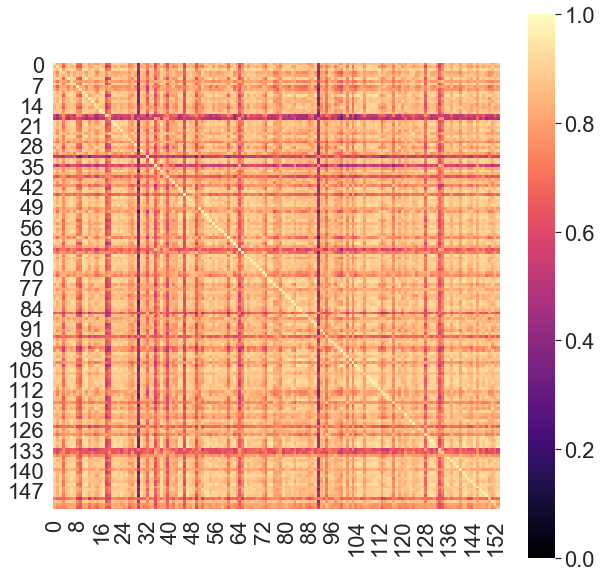

In [28]:
# plot example particiapnt corr matrix
plt.figure(figsize=(10, 10))
axs = sns.heatmap(predictions, cmap='magma', square=True,  vmin=0, vmax=1)

#plt.savefig("/Users/jasondsc/Desktop/Alex_fingerprinting/figure4plot/corr_plot_psd.pdf", bbox_inches='tight')

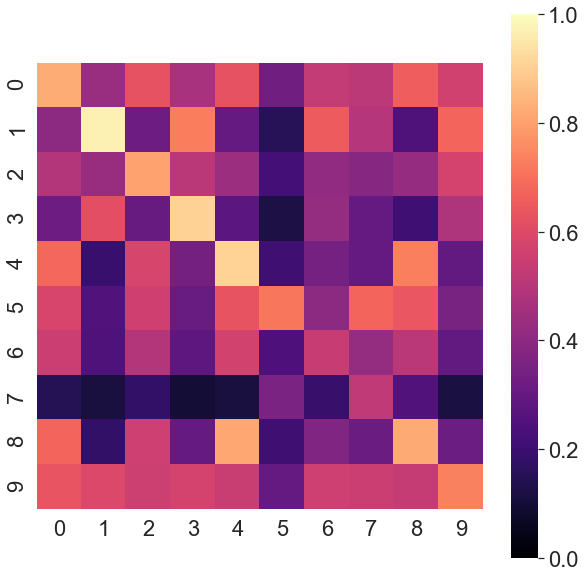

In [63]:
# plot subset of participant corr matrix
plt.figure(figsize=(10, 10))
axs = sns.heatmap(predictions[111:121,111:121], cmap='magma', square=True,  vmin=0, vmax=1)

#plt.savefig("/Users/jasondsc/Desktop/Alex_fingerprinting/figure4plot/example_corr_2.pdf", bbox_inches='tight')

In [23]:
# First we get subject number
def subs_list(sub):
    if sub < 10:
        return 'sub-000' + sub.astype(int).astype(str)
    elif sub >= 10 and sub < 100:
        return 'sub-00' + sub.astype(int).astype(str)
    else: 
        return 'sub-0' + sub.astype(int).astype(str)
    
    
# Get subject data fromCA (Raw)
subs_analyzed = list(map(subs_list, sub_target[:, -1]))
subs_omega = pd.read_csv('dependency/QPN_demo_data.csv', sep=',', header=0)

# Wrangle data to get subjecs' age
sub_moca = list(subs_omega['MoCA (Raw)'].values)
for x in range(len(sub_moca)):
    if isinstance(sub_moca[x], str):
        sub_moca[x] = sub_moca[x][3:5]
    if (sub_moca[x]==""):
        sub_moca[x] = np.nan
        
subs_omega['X.session.moca.'] = sub_moca
subs_omega = subs_omega.rename(columns={'X.session.moca.': 'moca'})

sub_UPDRS = list(subs_omega['UPDRS Score'].values)
for x in range(len(sub_UPDRS)):
    if isinstance(sub_UPDRS[x], str):
        sub_UPDRS[x] = sub_UPDRS[x][3:5]
    if (sub_UPDRS[x]==""):
        sub_UPDRS[x] = np.nan
        
subs_omega['X.session.UPDRS.'] = sub_UPDRS
subs_omega = subs_omega.rename(columns={'X.session.UPDRS.': 'UPDRS'})

# Do some final wrangling before plotting relationshisp between variables and 
cor_predictions=np.diagonal(predictions)
subs_omega['identifiability'] = self_id
subs_omega['corr'] = cor_predictions

subs_ctl=subs_omega.loc[subs_omega['Group'] == 'Control']
subs_pd=subs_omega.loc[subs_omega['Group'] == 'Parkinson']



# empty room fingerprinting

In [116]:
# please not you will have to chnage the index into the file name depending on the folder (i.e., challenge)
# note that the specparam data has only 115 features

# Parameters
n_subs = 154 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    print(filename[18:22])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[18:22])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('emptyroomFUL/') if isfile(join('emptyroomFUL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'emptyroomFUL/' + iFile
    print(sub)
    print(sub[32])
    if sub[32] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        

emptyroomFUL/sub_00001_spectrum_training.csv
t
0001
emptyroomFUL/sub_00001_spectrum_validation.csv
v
0001
emptyroomFUL/sub_00002_spectrum_training.csv
t
0002
emptyroomFUL/sub_00002_spectrum_validation.csv
v
0002
emptyroomFUL/sub_00003_spectrum_training.csv
t
0003
emptyroomFUL/sub_00003_spectrum_validation.csv
v
0003
emptyroomFUL/sub_00004_spectrum_training.csv
t
0004
emptyroomFUL/sub_00004_spectrum_validation.csv
v
0004
emptyroomFUL/sub_00005_spectrum_training.csv
t
0005
emptyroomFUL/sub_00005_spectrum_validation.csv
v
0005
emptyroomFUL/sub_00006_spectrum_training.csv
t
0006
emptyroomFUL/sub_00006_spectrum_validation.csv
v
0006
emptyroomFUL/sub_00007_spectrum_training.csv
t
0007
emptyroomFUL/sub_00007_spectrum_validation.csv
v
0007
emptyroomFUL/sub_00008_spectrum_training.csv
t
0008
emptyroomFUL/sub_00008_spectrum_validation.csv
v
0008
emptyroomFUL/sub_00009_spectrum_training.csv
t
0009
emptyroomFUL/sub_00009_spectrum_validation.csv
v
0009
emptyroomFUL/sub_00010_spectrum_training.csv
t

emptyroomFUL/sub_00079_spectrum_validation.csv
v
0079
emptyroomFUL/sub_00080_spectrum_training.csv
t
0080
emptyroomFUL/sub_00080_spectrum_validation.csv
v
0080
emptyroomFUL/sub_00081_spectrum_training.csv
t
0081
emptyroomFUL/sub_00081_spectrum_validation.csv
v
0081
emptyroomFUL/sub_00082_spectrum_training.csv
t
0082
emptyroomFUL/sub_00082_spectrum_validation.csv
v
0082
emptyroomFUL/sub_00083_spectrum_training.csv
t
0083
emptyroomFUL/sub_00083_spectrum_validation.csv
v
0083
emptyroomFUL/sub_00084_spectrum_training.csv
t
0084
emptyroomFUL/sub_00084_spectrum_validation.csv
v
0084
emptyroomFUL/sub_00085_spectrum_training.csv
t
0085
emptyroomFUL/sub_00085_spectrum_validation.csv
v
0085
emptyroomFUL/sub_00086_spectrum_training.csv
t
0086
emptyroomFUL/sub_00086_spectrum_validation.csv
v
0086
emptyroomFUL/sub_00087_spectrum_training.csv
t
0087
emptyroomFUL/sub_00087_spectrum_validation.csv
v
0087
emptyroomFUL/sub_00088_spectrum_training.csv
t
0088
emptyroomFUL/sub_00088_spectrum_validation.csv

In [117]:
# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

When predicting the target from the database, we get a 3.246% accuracy
When predicting the database from the target, we get a 0.649% accuracy


#  healthy controls to compute clinical score for each PD


In [198]:
n_subs=154
n_subs_2=76
self_id_clinical=np.zeros(n_subs)
self_corr_clinical=np.zeros(n_subs)
clinic=np.zeros(n_subs)

for i in range(75,154):
    np_arr1=np.array(i)
    np_arr2=np.array(range(0,75))
    index=np.append(np_arr2, np_arr1)

    sub_target_1=sub_target[index, :]
    sub_database_1=sub_database[index, :]
    
    # Correlations can be computed as the dot product between two z-scored vectors
    z_target = sp.stats.zscore(sub_target_1[:, :-1], axis = 1)
    z_database = sp.stats.zscore(sub_database_1[:,:-1], axis = 1)
    predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
    target_from_database = accuracy_score(range(n_subs_2), predictions.argmax(axis = 1))
    database_from_target = accuracy_score(range(n_subs_2), predictions.argmax(axis = 0))
    
    self_id = np.diagonal(sp.stats.zscore(predictions, axis = 1))
    cor_predictions=np.diagonal(predictions)
    clinic[i]=predictions.mean(axis=1)[-1]
    
    self_id_clinical[i]=self_id[-1]
    self_corr_clinical[i]=cor_predictions[-1]

    
# Do some final wrangling before plotting relationshisp between variables and 
subs_omega['identifiability_clinic'] = self_id_clinical
subs_omega['corr_clinic'] = self_corr_clinical
subs_omega['clinic_finger_score'] = clinic

subs_ctl=subs_omega.loc[subs_omega['Group'] == 'Control']
subs_pd=subs_omega.loc[subs_omega['Group'] == 'Parkinson']

#subs_omega.to_csv('QPN_demo_with_fingerprinting_score_new_tester.csv')

#sub_target_1 = pd.DataFrame(sub_target_1)
#sub_target_1.to_csv('example_clinical_finger_target_matrix.csv')



#  PD to compute corr of each HC to clinical dataset

In [19]:
n_subs=154
n_subs_2=80
self_id_clinical=np.zeros(n_subs)
self_corr_clinical=np.zeros(n_subs)
clinic=np.zeros(n_subs)

for i in range(0,75):
    np_arr1=np.array(i)
    np_arr2=np.array(range(75,154))
    index=np.append(np_arr2, np_arr1)

    sub_target_1=sub_target[index, :]
    sub_database_1=sub_database[index, :]
    
    # Correlations can be computed as the dot product between two z-scored vectors
    z_target = sp.stats.zscore(sub_target_1[:, :-1], axis = 1)
    z_database = sp.stats.zscore(sub_database_1[:,:-1], axis = 1)
    predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
    target_from_database = accuracy_score(range(n_subs_2), predictions.argmax(axis = 1))
    database_from_target = accuracy_score(range(n_subs_2), predictions.argmax(axis = 0))
    
    self_id = np.diagonal(sp.stats.zscore(predictions, axis = 1))
    cor_predictions=np.diagonal(predictions)
    clinic[i]=predictions.mean(axis=1)[-1]
    
    self_id_clinical[i]=self_id[-1]
    self_corr_clinical[i]=cor_predictions[-1]

    
# Do some final wrangling before plotting relationshisp between variables and 
subs_omega['identifiability_clinic'] = self_id_clinical
subs_omega['corr_clinic'] = self_corr_clinical
subs_omega['clinic_finger_score'] = clinic

subs_ctl=subs_omega.loc[subs_omega['Group'] == 'Control']
subs_pd=subs_omega.loc[subs_omega['Group'] == 'Parkinson']

#subs_omega.to_csv('QPN_demo_with_fingerprinting_score_controls_ID.csv')

#sub_target_1 = pd.DataFrame(sub_target_1)
#sub_target_1.to_csv('example_clinical_finger_target_matrix_Control_ID.csv')

#  just control fingerprinting

In [205]:
# Parameters
n_subs = 75 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraCTL/') if isfile(join('NEWspectraCTL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraCTL/' + iFile
    print(sub)
    print(sub[33])
    if sub[33] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        

NEWspectraCTL/sub_00001_spectrum_training.csv
t
0001
NEWspectraCTL/sub_00001_spectrum_validation.csv
v
0001
NEWspectraCTL/sub_00002_spectrum_training.csv
t
0002
NEWspectraCTL/sub_00002_spectrum_validation.csv
v
0002
NEWspectraCTL/sub_00003_spectrum_training.csv
t
0003
NEWspectraCTL/sub_00003_spectrum_validation.csv
v
0003
NEWspectraCTL/sub_00004_spectrum_training.csv
t
0004
NEWspectraCTL/sub_00004_spectrum_validation.csv
v
0004
NEWspectraCTL/sub_00005_spectrum_training.csv
t
0005
NEWspectraCTL/sub_00005_spectrum_validation.csv
v
0005
NEWspectraCTL/sub_00006_spectrum_training.csv
t
0006
NEWspectraCTL/sub_00006_spectrum_validation.csv
v
0006
NEWspectraCTL/sub_00007_spectrum_training.csv
t
0007
NEWspectraCTL/sub_00007_spectrum_validation.csv
v
0007
NEWspectraCTL/sub_00008_spectrum_training.csv
t
0008
NEWspectraCTL/sub_00008_spectrum_validation.csv
v
0008
NEWspectraCTL/sub_00009_spectrum_training.csv
t
0009
NEWspectraCTL/sub_00009_spectrum_validation.csv
v
0009
NEWspectraCTL/sub_00010_spec

In [206]:

# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

When predicting the target from the database, we get a 92.0% accuracy
When predicting the database from the target, we get a 93.33% accuracy


In [207]:
# For the figure, we also get self-identifiability and reconstructed self-identifiability
self_id= np.diagonal(sp.stats.zscore(predictions, axis = 1))
print(self_id)

#df = pd.DataFrame(self_id)
#df.to_csv("PD_SOURCE_self_identification_CTL_only_new.csv")



[4.12848632 2.71424031 2.48922031 2.74036786 0.90181348 5.15111098
 2.53080254 4.05530458 3.41892148 1.84608121 2.56649568 3.36369961
 3.69289245 2.77851397 4.60195306 2.62770044 3.01362942 2.9906966
 4.09380716 1.28765603 2.57795181 2.76401388 4.49482666 2.49803915
 3.41440594 2.77003888 1.02391649 1.75009766 4.641062   3.80481624
 3.02914785 1.97162843 4.23262185 2.82482959 3.02435322 4.40797811
 3.24666798 2.77904931 0.98860087 2.60227674 2.56285177 3.32841556
 3.10063445 3.0611838  2.10162192 3.23252869 2.99304329 3.77710925
 1.96401537 1.75347381 3.279214   3.40013016 2.9106209  2.87934046
 3.41145825 4.2824399  3.62878097 5.17483982 2.8695367  3.54887157
 3.74882375 2.67310252 4.43858471 2.28701711 4.81771225 3.0792477
 3.02829932 2.48743367 3.57862059 3.74131663 3.75482788 3.37545944
 5.26264777 3.92559958 3.48099701]


#  just PD fingerprinting

In [188]:
# Parameters

# NOTE CHANGE SUB_TARGET NAME TO PDSUB_TARGET
n_subs = 79 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraPKD/') if isfile(join('NEWspectraPKD/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraPKD/' + iFile
    print(sub)
    print(sub[33])
    if sub[33] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1

NEWspectraPKD/sub_00076_spectrum_training.csv
t
0076
NEWspectraPKD/sub_00076_spectrum_validation.csv
v
0076
NEWspectraPKD/sub_00077_spectrum_training.csv
t
0077
NEWspectraPKD/sub_00077_spectrum_validation.csv
v
0077
NEWspectraPKD/sub_00078_spectrum_training.csv
t
0078
NEWspectraPKD/sub_00078_spectrum_validation.csv
v
0078
NEWspectraPKD/sub_00079_spectrum_training.csv
t
0079
NEWspectraPKD/sub_00079_spectrum_validation.csv
v
0079
NEWspectraPKD/sub_00080_spectrum_training.csv
t
0080
NEWspectraPKD/sub_00080_spectrum_validation.csv
v
0080
NEWspectraPKD/sub_00081_spectrum_training.csv
t
0081
NEWspectraPKD/sub_00081_spectrum_validation.csv
v
0081
NEWspectraPKD/sub_00082_spectrum_training.csv
t
0082
NEWspectraPKD/sub_00082_spectrum_validation.csv
v
0082
NEWspectraPKD/sub_00083_spectrum_training.csv
t
0083
NEWspectraPKD/sub_00083_spectrum_validation.csv
v
0083
NEWspectraPKD/sub_00084_spectrum_training.csv
t
0084
NEWspectraPKD/sub_00084_spectrum_validation.csv
v
0084
NEWspectraPKD/sub_00085_spec

NEWspectraPKD/sub_00152_spectrum_training.csv
t
0152
NEWspectraPKD/sub_00152_spectrum_validation.csv
v
0152
NEWspectraPKD/sub_00153_spectrum_training.csv
t
0153
NEWspectraPKD/sub_00153_spectrum_validation.csv
v
0153
NEWspectraPKD/sub_00154_spectrum_training.csv
t
0154
NEWspectraPKD/sub_00154_spectrum_validation.csv
v
0154


In [189]:

# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

When predicting the target from the database, we get a 77.21% accuracy
When predicting the database from the target, we get a 77.21% accuracy


In [191]:
# For the figure, we also get self-identifiability and reconstructed self-identifiability
self_id= np.diagonal(sp.stats.zscore(predictions, axis = 1))
print(self_id)

#df = pd.DataFrame(self_id)
#df.to_csv("PD_SOURCE_self_identification_PD_only_new.csv")



[ 1.99804021  1.80197213  2.08421734  2.97395305  3.70091059  2.16275825
  3.08503379  2.89690939  3.0664387   2.78361725  2.74066945  3.27145362
  1.63908822  0.90124549  3.4846244   3.78244344  1.09061253  3.30307433
  1.99557995  3.92484305  1.72452287  3.28093514  2.55488549  1.93465259
  1.46093903  2.38600732  2.06658406  2.83515074  3.96690072  2.11444532
  2.4679851   2.10464459  2.35091052 -0.9791822   3.57776442  2.04942421
  2.28123786  2.72609539  3.37906076  3.98439823  2.12980902  1.87093431
  0.98901417  3.96310298  1.7496152   1.75348952  2.43164131  3.61602633
  2.21600597  3.35190953  0.23217957  2.84638346  2.52249851  3.59796037
  2.76264247  4.20328132  3.64440882  3.87542636  2.87922416  3.15404886
  3.72740846  3.13300849  2.55234984  1.19459529  2.81731528  6.95744508
  3.15250361  0.84505678  3.03293769  2.52650873  2.94255196  4.58872069
  2.60132875  1.75519949  2.51934179  3.07805336  0.90205124  2.93144689
  2.96634262]


#### PD patient fingeprinting seems to perfrom worse
## Try bootstrapping approach to quantify relibaility of fingerprinting 

In [13]:
from random import sample
# Parameters
n_subs = 154 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraFUL/') if isfile(join('NEWspectraFUL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraFUL/' + iFile
    #print(sub)
    #print(sub[33])
    if sub[33] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        
        
n_subs=140
niter=1000
bootstrap = np.zeros([niter, 2])
self_id =np.zeros([n_subs, niter])

for j in range(0,niter):
    index=sample(range(154), n_subs)
    Tempsub_target=sub_target[index,:]
    Tempsub_database=sub_database[index,:]
    # Correlations can be computed as the dot product between two z-scored vectors
    z_target = sp.stats.zscore(Tempsub_target[:, :-1], axis = 1)
    z_database = sp.stats.zscore(Tempsub_database[:,:-1], axis = 1)
    predictions = z_target.dot(z_database.transpose()) / (Tempsub_database.shape[1] - 1) # target, database
    bootstrap[j,0] = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
    bootstrap[j,1] = accuracy_score(range(n_subs), predictions.argmax(axis = 0))
    self_id[0:n_subs,j] = np.diagonal(sp.stats.zscore(predictions, axis = 1))

print(mean_confidence_interval(bootstrap.flatten()))

print(mean_confidence_interval(self_id.flatten()))

(0.8318821428571429, 0.7928571428571428, 0.8714285714285714)
(3.040378819256391, 0.8390474145429915, 5.222651940638943)


In [33]:
from random import sample
# Parameters
n_subs = 75 # Change here to get number of participants! 
n_feats = int(68*301)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,150:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraCTL/') if isfile(join('NEWspectraCTL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraCTL/' + iFile
    #print(sub)
    #print(sub[33])
    if sub[33] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        
        
n_subs=67
niter=1000
bootstrap = np.zeros([niter, 2])
self_id =np.zeros([n_subs, niter])

for j in range(0,niter):
    index=sample(range(75), n_subs)
    Tempsub_target=sub_target[index,:]
    Tempsub_database=sub_database[index,:]
    # Correlations can be computed as the dot product between two z-scored vectors
    z_target = sp.stats.zscore(Tempsub_target[:, :-1], axis = 1)
    z_database = sp.stats.zscore(Tempsub_database[:,:-1], axis = 1)
    predictions = z_target.dot(z_database.transpose()) / (Tempsub_database.shape[1] - 1) # target, database
    bootstrap[j,0] = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
    bootstrap[j,1] = accuracy_score(range(n_subs), predictions.argmax(axis = 0))
    self_id[0:n_subs,j] = np.diagonal(sp.stats.zscore(predictions, axis = 1))

print(mean_confidence_interval(bootstrap.flatten()))

print(mean_confidence_interval(self_id.flatten()))

(0.7510597014925373, 0.7164179104477612, 0.7910447761194029)
(1.957861700559092, -0.5262293237090293, 4.640344847713985)


In [ ]:
from random import sample
# Parameters
n_subs = 79 # Change here to get number of participants! 
n_feats = int(68*301)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,150:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraPKD/') if isfile(join('NEWspectraPKD/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraPKD/' + iFile
    #print(sub)
    #print(sub[33])
    if sub[33] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        
        
n_subs=71
niter=1000
bootstrap = np.zeros([niter, 2])
self_id =np.zeros([n_subs, niter])

for j in range(0,niter):
    index=sample(range(79), n_subs)
    Tempsub_target=sub_target[index,:]
    Tempsub_database=sub_database[index,:]
    # Correlations can be computed as the dot product between two z-scored vectors
    z_target = sp.stats.zscore(Tempsub_target[:, :-1], axis = 1)
    z_database = sp.stats.zscore(Tempsub_database[:,:-1], axis = 1)
    predictions = z_target.dot(z_database.transpose()) / (Tempsub_database.shape[1] - 1) # target, database
    bootstrap[j,0] = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
    bootstrap[j,1] = accuracy_score(range(n_subs), predictions.argmax(axis = 0))
    self_id[0:n_subs,j] = np.diagonal(sp.stats.zscore(predictions, axis = 1))

print(mean_confidence_interval(bootstrap.flatten()))

print(mean_confidence_interval(self_id.flatten()))

# II. Edgewise contributions to identifiability

## Now that we know subjects are highly identifiable, we ask the question: what edges are driving this? Are there edges that are more important than others? T


In [24]:
# please not you will have to chnage the index into the file name depending on the folder (i.e., challenge)
# note that the specparam data has only 115 features

# Parameters
n_subs = 154 # Change here to get number of participants! 
n_feats = int(68*451)
n_measurements = 2

# Warangle data set into two big feature matrices
def prune_subject_csv(filename):
    '''
    This function takes in the subject's csv file from MATLAB, takes out the 
    doubled correlations (because of symmetry) and outputs a numpy array ready to be concatenated
    in the grand feature matrix
    Args:
        filename (string): Name of the csv matrix
    Returns: 
        sub_feat (np.array): Subject's features 
    '''
    #print(filename)
    print(filename[19:23])
    sub_feat = np.zeros([1, (n_feats)+1]) # Number of unique values in corr matrix + subject label
    psd_matrix = pd.read_csv(filename, header=None)
    mat=np.asmatrix(psd_matrix)
    sub_feat[0, :-1]=mat[:,0:451].flatten()
    sub_feat[0, -1] = int(filename[19:23])    
    return sub_feat


# Get n subjects: both training and testing datasets
onlyfiles = [f for f in listdir('NEWspectraFUL/') if isfile(join('NEWspectraFUL/', f))]
sub_target = np.zeros([n_subs, (n_feats)+1])
sub_database = np.zeros([n_subs, (n_feats)+1])
iv = 0
it = 0
for iFile in sorted(onlyfiles)[0:(n_subs*2)]: 
    sub = 'NEWspectraFUL/' + iFile
    print(sub)
    print(sub[33])
    if sub[33] == 'v':
        sub_target[iv, :] = prune_subject_csv(sub)
        iv += 1
    else:
        sub_database[it, :] = prune_subject_csv(sub)
        it += 1
        
        
# Correlations can be computed as the dot product between two z-scored vectors
z_target = sp.stats.zscore(sub_target[:, :-1], axis = 1)
z_database = sp.stats.zscore(sub_database[:,:-1], axis = 1)
predictions = z_target.dot(z_database.transpose()) / (sub_database.shape[1] - 1) # target, database
target_from_database = accuracy_score(range(n_subs), predictions.argmax(axis = 1))
database_from_target = accuracy_score(range(n_subs), predictions.argmax(axis = 0))

print('When predicting the target from the database, we get a ' + str(target_from_database*100)[0:5] + '% accuracy')
print('When predicting the database from the target, we get a ' + str(database_from_target*100)[0:5] + '% accuracy')

NEWspectraFUL/sub_00001_spectrum_training.csv
t
0001
NEWspectraFUL/sub_00001_spectrum_validation.csv
v
0001
NEWspectraFUL/sub_00002_spectrum_training.csv
t
0002
NEWspectraFUL/sub_00002_spectrum_validation.csv
v
0002
NEWspectraFUL/sub_00003_spectrum_training.csv
t
0003
NEWspectraFUL/sub_00003_spectrum_validation.csv
v
0003
NEWspectraFUL/sub_00004_spectrum_training.csv
t
0004
NEWspectraFUL/sub_00004_spectrum_validation.csv
v
0004
NEWspectraFUL/sub_00005_spectrum_training.csv
t
0005
NEWspectraFUL/sub_00005_spectrum_validation.csv
v
0005
NEWspectraFUL/sub_00006_spectrum_training.csv
t
0006
NEWspectraFUL/sub_00006_spectrum_validation.csv
v
0006
NEWspectraFUL/sub_00007_spectrum_training.csv
t
0007
NEWspectraFUL/sub_00007_spectrum_validation.csv
v
0007
NEWspectraFUL/sub_00008_spectrum_training.csv
t
0008
NEWspectraFUL/sub_00008_spectrum_validation.csv
v
0008
NEWspectraFUL/sub_00009_spectrum_training.csv
t
0009
NEWspectraFUL/sub_00009_spectrum_validation.csv
v
0009
NEWspectraFUL/sub_00010_spec

NEWspectraFUL/sub_00077_spectrum_validation.csv
v
0077
NEWspectraFUL/sub_00078_spectrum_training.csv
t
0078
NEWspectraFUL/sub_00078_spectrum_validation.csv
v
0078
NEWspectraFUL/sub_00079_spectrum_training.csv
t
0079
NEWspectraFUL/sub_00079_spectrum_validation.csv
v
0079
NEWspectraFUL/sub_00080_spectrum_training.csv
t
0080
NEWspectraFUL/sub_00080_spectrum_validation.csv
v
0080
NEWspectraFUL/sub_00081_spectrum_training.csv
t
0081
NEWspectraFUL/sub_00081_spectrum_validation.csv
v
0081
NEWspectraFUL/sub_00082_spectrum_training.csv
t
0082
NEWspectraFUL/sub_00082_spectrum_validation.csv
v
0082
NEWspectraFUL/sub_00083_spectrum_training.csv
t
0083
NEWspectraFUL/sub_00083_spectrum_validation.csv
v
0083
NEWspectraFUL/sub_00084_spectrum_training.csv
t
0084
NEWspectraFUL/sub_00084_spectrum_validation.csv
v
0084
NEWspectraFUL/sub_00085_spectrum_training.csv
t
0085
NEWspectraFUL/sub_00085_spectrum_validation.csv
v
0085
NEWspectraFUL/sub_00086_spectrum_training.csv
t
0086
NEWspectraFUL/sub_00086_spec

NEWspectraFUL/sub_00154_spectrum_validation.csv
v
0154
When predicting the target from the database, we get a 80.51% accuracy
When predicting the database from the target, we get a 85.06% accuracy


## Intraclass Correlation Coefficient: Original Data
### A note on ICC
    - We are also using ICC to analyze this data based on Amicto & Goñi, 2018
    - They do not explicitely report what flavour of ICC they used, but, based on their description, they are using a consistency ICC (ICC(1, 1) in Shrout and Fleiss, 1979 terms)
    - This is a one-way random effects model where each item is rated by different raters who are considered as sampled from a larger pool of potential raters
        - Hence they are treated as random effects
        - This ICC is interpreted as the ratio between variance between subjects and total variance
    - We chose this because we are testing for inter-rater reliability (the same subject) and each subjects are their own raters (one way random effects)

In [26]:
icc = np.zeros(z_target.shape[1])

n = n_subs
k = n_measurements
df_b = n-1
df_w = n*(k-1)

for i_edge in range(z_target.shape[1]):
    # Original
    x = np.concatenate((np.expand_dims(z_target[:, i_edge], axis = 1), np.expand_dims(z_database[:, i_edge], axis = 1)), axis = 1)
    x_w_mean = x.mean(axis = 1)
    x_g_mean = x.mean()
    ss_t = ((x - x_g_mean) ** 2).sum()
    ss_w = ((x - np.expand_dims(x_w_mean, axis = 1)) ** 2).sum()
    ss_b = ss_t - ss_w
    ms_b = ss_b / df_b
    ms_w = ss_w / df_w
    icc[i_edge] = (ms_b - ms_w) / (ms_b + ((k-1)*ms_w))
    
    
min_icc = np.min(icc)
max_icc = np.max(icc)


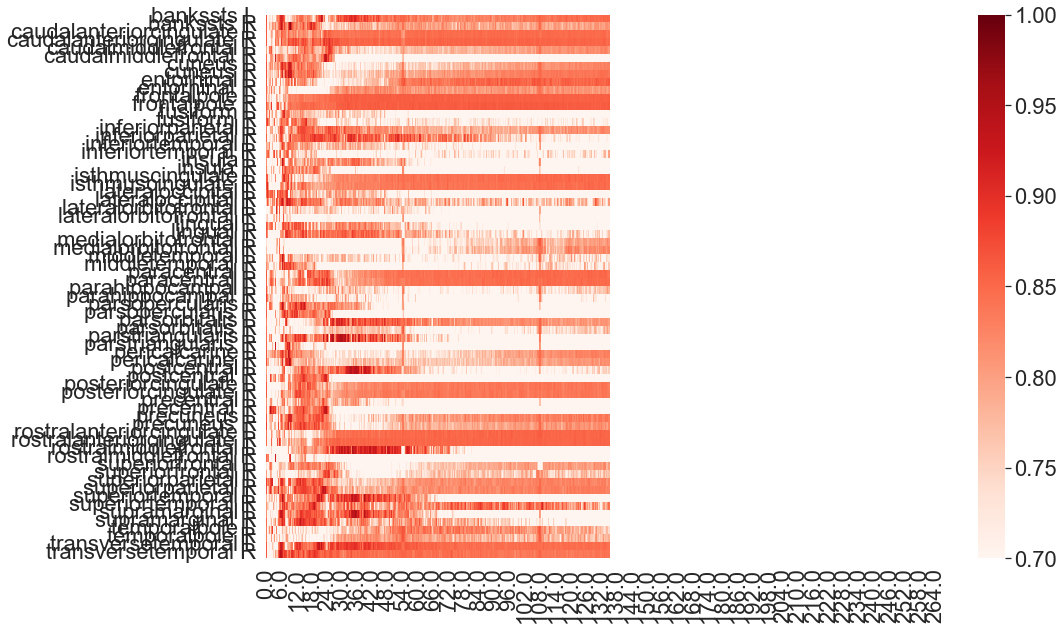

In [29]:

atlasdk=pd.read_csv('/Users/jasondsc/Desktop/McGill/python_codes/dependencies/desikan_killiany_68.csv', header=None)
reshaped_icc=np.reshape(icc, (68,-1))
reshaped_icc.shape
#print(differential_power)
plt.figure(figsize=(15, 10))
axs = sns.heatmap(reshaped_icc, cmap='Reds', vmin=0.70, vmax=1)
plt.xticks(np.arange(0, 900, 20), np.arange(0, 300, 0.3)[range(0,900,20)])
plt.yticks(np.arange(0, 68, 1),atlasdk[atlasdk.columns[0]], rotation=0)
#plt.savefig("LAT_original_ICC_PSD_full_edgewise_CTL.pdf", bbox_inches='tight')

iccorig = pd.DataFrame(reshaped_icc)
iccorig.to_csv("right_ICC_orig_test.csv", header=False, index=False)
